## AlvaHmm image analysis

In [1]:
'''
author: Alvason Zhenhua Li
date:   from 11/21/2016 to 01/10/2018
'''
### open_package +++
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import time
import sys
import os
import shutil
import logging
logging.basicConfig(format = '%(asctime)s %(message)s',
                    level = logging.INFO, stream = sys.stdout)
if __name__ == '__main__': logging.info('(previous_run_time)')
### open_package ---
### local_package +++
import alva_machinery.markov.aChain as alva_MCMC
import alva_machinery.branching.aWay as alva_branch
### local_package ---
###
import IPython.core.display as core
def pd_print(data, width = None, column = None, row = None):
    ## setting the display of pd.DataFrame
    if width is None: width = 100
    if column is None: column = 100
    if row is None: row = 100
    pd.set_option('display.max_colwidth', width)
    pd.set_option('display.max_columns', column)
    pd.set_option('display.max_rows', row)
    pd_table = core.display(pd.DataFrame(data))
    return pd_table
###
### saving figure
saving_folder = 'figure'
### an unique folder for saving
code_name_folder = '_random_reaction'
### folder for saving figure +++
saving_path = os.path.join(saving_folder, code_name_folder)
main_saving_path = os.path.abspath(saving_path)
if not os.path.exists(main_saving_path):
    logging.info('Building {:}'.format(main_saving_path))
    os.makedirs(main_saving_path)
### folder for saving figure ---
### an unique name for saving
###
which_map = int(1)
code_name_file = ['_edge_detection', '_skeletonization', '_blob'][which_map]
###

2021-03-27 17:25:45,283 (previous_run_time)


In [2]:
### reading tsv-file +++
reading_path = 'raw_image'
main_reading_path = os.path.abspath(reading_path)
### file-folder in sample_name
sample_name = np.array(['AlvaHmm_demo_raw',
                       ])
### set sample for loading
sn = 0
sample_reading_path = os.path.join(main_reading_path, sample_name[sn])
### reading tsv-file ---
#######################################
### folder for saving figure +++
sample_saving_path = os.path.join(main_saving_path, sample_name[sn])    
if not os.path.exists(sample_saving_path):
    logging.info('Building {:}'.format(sample_saving_path))
    os.makedirs(sample_saving_path)
### folder for saving figure ---
## file_name for saving file
file_name = sample_name[sn] + code_name_file
#######################################
file_list = os.listdir(sample_reading_path)
### removing the hidden_file so that the file_list is consistent because some folder has no hidden_file +++
for fn in file_list:
    if fn == '.DS_Store':
        file_list.remove(fn)
### removing the hidden_file so that the file_list is consistent because some folder has no hidden_file ---
pd_print(pd.DataFrame(file_list, columns = {'file_list'}))
###

,file_list
0,zzz20161011_Day5_SY5Y_17c_1_PGP9.5.488_10X001.tif
1,zzz20161011_NGF1_simple_aaa.jpg
2,NGF_1_201612_demo0.jpg


In [3]:
### file_with_pixel_information +++
for file_i in file_list:
    if 'zzz20161011_Day5_SY5Y_17c_1_PGP9.5.488_10X001.tif' in file_i:
        file_with_infomation = file_i
### file_with_pixel_information ---
import skimage.external.tifffile as tiff
file_reading = os.path.join(sample_reading_path, file_with_infomation)
tif = tiff.TiffFile(file_reading)
#print(tif[0].tags)
pixel_per_meter_origin = tif[0].x_resolution 
print('pixel_per_meter_origin (10^6 micrometer) =', pixel_per_meter_origin)
micrometer_per_pixel_origin = pixel_per_meter_origin[1] / pixel_per_meter_origin[0]
print('micrometer_per_pixel_origin =', micrometer_per_pixel_origin)

pixel_per_meter_origin (10^6 micrometer) = (1549363, 1000000)
micrometer_per_pixel_origin = 0.6454265398102317


image_date =  NGF_1_20
(1242, 1418, 3) uint8


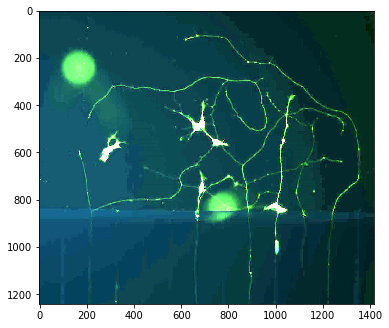

In [4]:
'''file_in_order --- for actual computing now'''
###
### file_with_pixel_information +++
for file_i in file_list:
    #if 'zzz2016_NGF_demo1.jpg' in file_i:
    #if 'demo20161011_NGF1_simple_weak.jpg' in file_i:
    #if 'demo20161011_NGF1_complex_weak.jpg' in file_i:
    if 'NGF_1_201612_demo0.jpg' in file_i:
        file_in_order = file_i
### file_with_pixel_information ---
image_date = file_in_order[:8]
print('image_date = ', image_date)
### adjusting MAX_IMAGE_PIXELS for avoiding raising an error in case image.h * image.w over the specified limit
from PIL import Image
Image.MAX_IMAGE_PIXELS = 10**9
###
file_reading = os.path.join(sample_reading_path, file_in_order)
mmm = mpl.image.imread(file_reading)
### masking_xx_left ---
# if (sample_name[sn] == 'NGF_1'):
#     masking_xx_left = int(400)
# mmm[:, :masking_xx_left] = 0
### masking_xx_left +++
## rescale_intensity ---
from skimage import exposure  
if 'weak' in file_in_order:
    percent_low, percent_high = np.percentile(mmm, (1, 99.3))  
    mmm = exposure.rescale_intensity(mmm, in_range = (percent_low, percent_high))
if 'NGF_1_201612_demo0.jpg' in file_in_order:
    percent_low, percent_high = np.percentile(mmm, (1, 99))  
    mmm = exposure.rescale_intensity(mmm, in_range = (percent_low, percent_high))
### rescale_intensity +++
#########################
### image_rotation
from scipy import ndimage
mmm = ndimage.rotate(mmm, 90)
###
###
image_name = '_origin'
file_suffix = '.png'
file_saving = os.path.join(sample_saving_path, file_name + image_name + file_suffix)
mpl.image.imsave(file_saving, mmm)
print (mmm.shape, mmm.dtype)
###
plt.figure(figsize = (6, 6))
plt.imshow(mmm)
#plt.imshow(mmm[:1024, :1024, :])
#plt.xticks(rotation = 90)
plt.show()

## resize and normalize image for practical analysis

(1242, 1418, 4) float32
origin_pixel_ =  1242 1418
normalization = 0.0 1.0
micrometer_per_pixel_raw = 1.2908530796204634
shape = (621, 709, 4) dtype = float32 normalization = 0.0 1.0
raw_pixel_ =  621 709


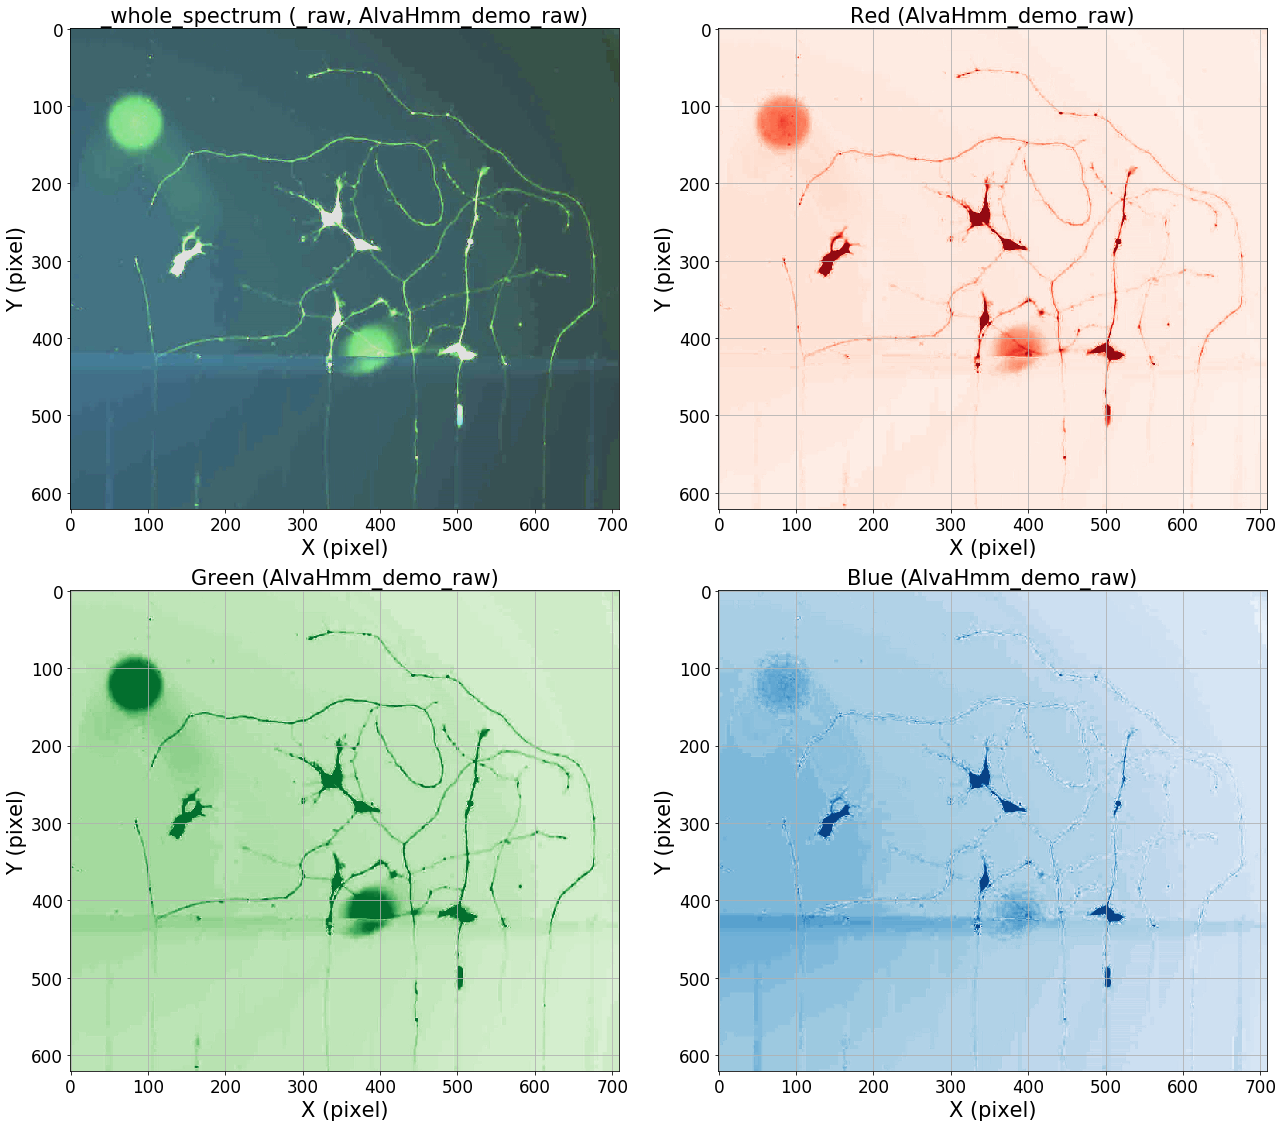

In [5]:
section_name = '_whole_spectrum'
### resize_normalize +++
### reading +++
image_name = '_origin'
file_suffix = '.png'
file_reading = os.path.join(sample_saving_path, file_name + image_name + file_suffix)
mmm = mpl.image.imread(file_reading)
### reading ---
###
print (mmm.shape, mmm.dtype)
origin_pixel_y, origin_pixel_x, origin_channel_color = mmm.shape
print ('origin_pixel_ = ', origin_pixel_y, origin_pixel_x)
### resize +++
zoomX = 1 / 2
import scipy.ndimage as ndimage
mmm_raw = ndimage.zoom(mmm, zoom = (zoomX, zoomX, 1))
### resize ---
### normalize +++
mmm_raw = mmm_raw - mmm_raw.min()
mmm_raw = mmm_raw / mmm_raw.max()
print('normalization =', mmm_raw.min(), mmm_raw.max())
### normalize ---
micrometer_per_pixel_raw = micrometer_per_pixel_origin / zoomX 
print('micrometer_per_pixel_raw =', micrometer_per_pixel_raw)
###
image_name = '_raw'
file_suffix = '.png'
file_saving = os.path.join(sample_saving_path, file_name + image_name + file_suffix)
mpl.image.imsave(file_saving, mmm_raw)
### resize_normalize ---
#################################################
### loading resized_normalized_image for analysis
#################################################
image_name = '_raw'
file_suffix = '.png'
file_reading = os.path.join(sample_saving_path, file_name + image_name + file_suffix)
### for RGB image --- array = MxNx3; for RGBA image --- array = MxNx4
mmm = mpl.image.imread(file_reading)
###
raw_pixel_y, raw_pixel_x, raw_channel_color = mmm.shape 
print('shape =', mmm.shape, 'dtype =', mmm.dtype, 'normalization =', mmm.min(), mmm.max())
print('raw_pixel_ = ', raw_pixel_y, raw_pixel_x)
#################################################
### channel_color_order +++
channel_color_order = ['Red', 'Green', 'Blue']
### channel_color_order ---
### plotting
figure_name = '{:}'.format(section_name)
file_suffix = '.png'
save_figure = os.path.join(sample_saving_path, file_name + figure_name + file_suffix)
AlvaFontSize = 21
wX = 2
wY = 2
wxx = 9 # window_width
figure = plt.figure(figsize = (wX*wxx, wY*wxx*(raw_pixel_y / raw_pixel_x)))
for wn in range(wX*wY):
    if (wn == 0):
        window = figure.add_subplot(wY, wX, wn + 1)
        window.set_title('{:} ({:}, {:})'.format(section_name, image_name, sample_name[sn]),
                         fontsize = AlvaFontSize) 
        window.imshow(mmm)
        window.set_xlabel('X (pixel)', fontsize = AlvaFontSize)
        window.set_ylabel('Y (pixel)', fontsize = AlvaFontSize)
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
    else:
        cn = wn - 1
        ### channel_color_selecting +++
        channel_color = channel_color_order[cn]
        ### channel_color_selecting ---
        mmmX = mmm[:, :, cn]
        ###
        file_suffix = '.png'
        file_saving = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
        mpl.image.imsave(file_saving, mmmX)
        ###
        file_suffix = '.npy'
        file_saving = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
        np.save(file_saving, mmmX)
        ###
        window = figure.add_subplot(wY, wX, wn + 1)
        window.set_title('{:} ({:})'.format(channel_color, sample_name[sn]), fontsize = AlvaFontSize)
        window.imshow(mmmX, cmap = channel_color + 's', interpolation = 'nearest')
        window.set_xlabel('X (pixel)', fontsize = AlvaFontSize)
        window.set_ylabel('Y (pixel)', fontsize = AlvaFontSize)
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        window.grid(True) 
figure.tight_layout()
plt.savefig(save_figure, dpi = 128, bbox_inches = 'tight')
plt.show()
##########

## 1.0 edge_detection

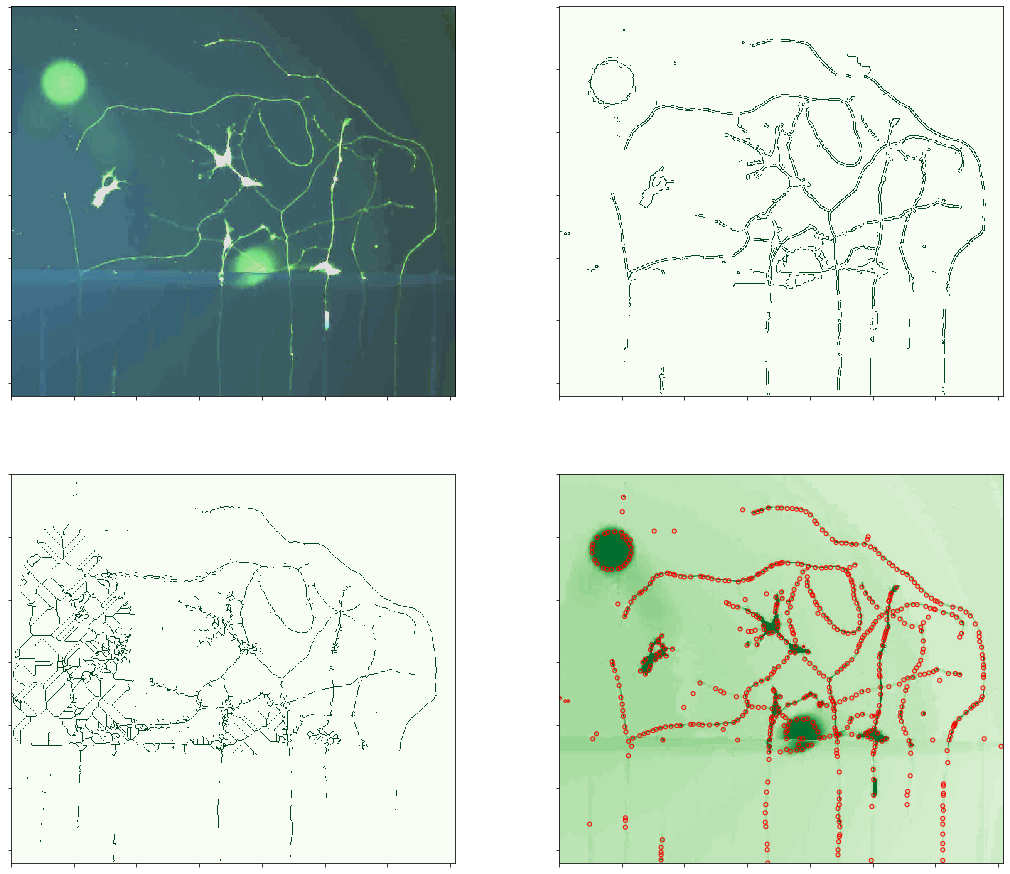

In [6]:
section_name = '_edge_detection'
###
#####################################################################
### plotting
figure_name = '{:}'.format(section_name)
file_suffix = '.png'
save_figure = os.path.join(sample_saving_path, file_name + figure_name + file_suffix)
AlvaFontSize = 21
wX = 2
wY = 2
wxx = 9 # window_width
figure = plt.figure(figsize = (wX*wxx, wY*wxx*(raw_pixel_y / raw_pixel_x)))
for wn in range(wX*wY):
    if (wn == 0):
        window = figure.add_subplot(wY, wX, wn + 1)
        ###
        section_name_in = ['_raw_image', '_edge_detection', '_skeletonization', '_blob'][wn]
        window.imshow(mmm_raw, interpolation = 'nearest')
        #window.set_title('{:}'.format(section_name_in), fontsize = AlvaFontSize) 
        ### window_saving +++
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
    if (wn == 1):
        window = figure.add_subplot(wY, wX, wn + 1)
        ###
        section_name_in = ['_raw_image', '_edge_detection', '_skeletonization', '_blob'][wn]
        ### reading mmm_array +++
        image_name = '_raw'
        channel_color = channel_color_order[1]
        file_suffix = '.npy'
        file_reading = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
        mm = np.load(file_reading)
        mmm = np.copy(mm)
        total_pixel_y, total_pixel_x = mmm.shape
        ### reading mmm_array ---
        ###
        ### filtering_noise_particle ---
        #from skimage import filters
        #mmm = filters.median(mmm)
        #mmm = (mmm - mmm.min()) / (mmm.max() - mmm.min())
        ### filtering_noise_particle +++
        ###
        from skimage import feature
        #bool_mmm = feature.canny(mmm, sigma = 2.5, low_threshold = 0.1, high_threshold = 0.94, use_quantiles = True)
        bool_mmm = feature.canny(mmm)
        ### boundary_masking +++
        bool_mmm[:, :2] = False
        bool_mmm[:, -2:] = False
        bool_mmm[:2, :] = False
        bool_mmm[-2:, :] = False
        ### boundary_masking ---
        ###
        new_mmm = np.array(bool_mmm, dtype = np.int64)
        file_suffix = '.png'
        saving_data_file = file_name + section_name_in
        mpl.image.imsave(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        file_suffix = '.npy'
        np.save(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        window.imshow(new_mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('{:} (canny)'.format(section_name_in), fontsize = AlvaFontSize)
        ### window_saving +++
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
    if (wn == 2):
        window = figure.add_subplot(wY, wX, wn + 1)
        section_name_in = ['_raw_image', '_edge_detection', '_skeletonization', '_blob'][wn]
        ### reading mmm_array +++
        image_name = '_raw'
        channel_color = channel_color_order[1]
        file_suffix = '.npy'
        file_reading = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
        mm = np.load(file_reading)
        mmm = np.copy(mm)
        total_pixel_y, total_pixel_x = mmm.shape
        ### reading mmm_array ---
        ### filtering_noise_particle ---
        #from skimage import filters
        #from skimage.morphology import disk
        #mmm = filters.median(mmm)
        ### filtering_noise_particle +++
        ###
        from skimage.filters import threshold_otsu, threshold_yen, threshold_li, threshold_isodata
        aaa = threshold_li(mmm)
        bool_mmm = mmm > aaa
        ### boundary_masking +++
        bool_mmm[:, :2] = False
        bool_mmm[:, -2:] = False
        bool_mmm[:2, :] = False
        bool_mmm[-2:, :] = False
        ### boundary_masking ---
        from skimage.morphology import remove_small_objects
        bbb = remove_small_objects(bool_mmm, min_size = 2)
        from skimage.morphology import skeletonize
        new_mmm = skeletonize(bbb)
        new_mmm = np.int64(new_mmm) #converting bool into number(1, 0)
        ###
        file_suffix = '.png'
        saving_data_file = file_name + section_name_in
        mpl.image.imsave(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        file_suffix = '.npy'
        np.save(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        window.imshow(new_mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('{:} (threshold-otsu)'.format(section_name_in), fontsize = AlvaFontSize)
        ### window_saving +++
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
    if (wn == 3):
        window = figure.add_subplot(wY, wX, wn + 1)
        section_name_in = ['_raw_image', '_edge_detection', '_skeletonization', '_blob'][wn]
        ### reading mmm_array +++
        image_name = '_raw'
        channel_color = channel_color_order[1]
        file_suffix = '.npy'
        file_reading = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
        mm = np.load(file_reading)
        mmm = np.copy(mm)
        total_pixel_y, total_pixel_x = mmm.shape
        ### reading mmm_array ---
        ### 
        ### seeding_by_local_max +++
        ### filtering_noise_particle ---
        from skimage import filters
        mmmF = filters.median(mmm)
        ### filtering_noise_particle +++
        ### gabor_filter +++
        # from skimage.filters import gabor
        # mmm, filt_imag = gabor(mmm, frequency = 0.9)
        ### gabor_filter ---
        ### detecting_island ---
        from skimage.feature import blob_dog as local_max
        galaxy = local_max(mmmF, min_sigma = 1, max_sigma = 2, threshold = 0.02)           
        ### detecting_island +++
        ### seeding_by_local_max ---
        for star in galaxy:
            y, x, r = star
            c = plt.Circle((x, y), r*2, color = 'red', linewidth = 1, fill = False)
            window.add_patch(c)
        ###
        yy = np.int64(galaxy[:, 0])
        xx = np.int64(galaxy[:, 1])
        new_mmm = np.copy(mm) * 0
        new_mmm[yy, xx] = 1
        ###
        file_suffix = '.png'
        saving_data_file = file_name + section_name_in
        mpl.image.imsave(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        file_suffix = '.npy'
        np.save(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        ###
        window.imshow(mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('total local_max islands = {:}'.format(galaxy.shape[0]), fontsize = AlvaFontSize)
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        #window.grid(True)
        ### window_saving +++
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
#figure.tight_layout()
plt.savefig(save_figure, dpi = 256)#, bbox_inches = 'tight')
plt.show()
##################

## 2. random_seeding_by_edge_map

total connect_way_pixel = 12482
total seed = 624


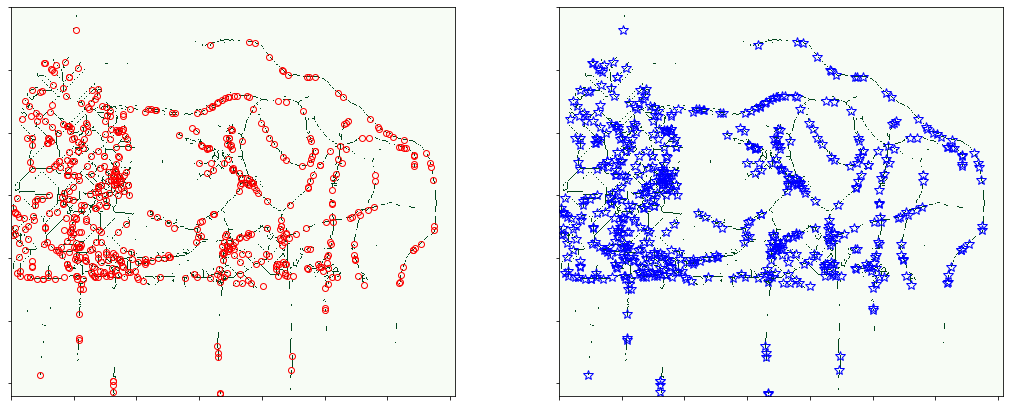

In [7]:
section_name = '_random_seeding_by_edge_map'
###
### reading mmm_array +++
image_name = '_raw'
channel_color = channel_color_order[1]
file_suffix = '.npy'
file_reading = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
mm = np.load(file_reading)
mmm = np.copy(mm)
total_pixel_y, total_pixel_x = mmm.shape
### reading mmm_array ---
###
### plotting
figure_name = '{:}'.format(section_name)
file_suffix = '.png'
save_figure = os.path.join(sample_saving_path, file_name + figure_name + file_suffix)
AlvaFontSize = 21
wX = 2
wY = 2
wxx = 9 # window_width
figure = plt.figure(figsize = (wX*wxx, wY*wxx*(raw_pixel_y / raw_pixel_x)))
for wn in range(wX*wY):
    if (wn == 0):
        window = figure.add_subplot(wY, wX, wn + 1)
        ###
        ### seeding_by_edge_map +++
        ### loading _axis_detection data +++
        section_name_in = ['_edge_detection', '_skeletonization', '_blob'][which_map]
        loading_data_file = file_name + section_name_in
        file_suffix = '.npy'
        mm = np.load(os.path.join(sample_saving_path, loading_data_file + file_suffix))
        mmm = np.copy(mm)
        print('total connect_way_pixel =', mmm.sum())
        ### loading _axis_detection data ---
        yy, xx = mmm.nonzero()
        if '_blob' in section_name_in:
            fraction = 1
        else: fraction = 20
        seed_index = np.random.choice(len(xx), int(len(xx) / fraction))
        seed_xx = xx[seed_index]
        seed_yy = yy[seed_index]
        total_seed = len(seed_xx)
        print('total seed =', len(seed_xx))
        ###
        window.plot(seed_xx, seed_yy, 'o', markersize = 6, markerfacecolor = 'None', markeredgecolor = 'red')
        ### seeding_by_edge_map ---
        ###
        ###
        window.imshow(mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('total local_max islands = {:}'.format(total_seed), fontsize = AlvaFontSize)
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        #window.grid(True)
        ### window_saving +++
        section_name_in = '_edge_map'
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
        ###
    if (wn == 1):
        window = figure.add_subplot(wY, wX, wn + 1)
        ### all seeding_point and their tracking
        for i in range(total_seed):
            window.plot(seed_xx[i], seed_yy[i],
                        '*', markersize = 10, markerfacecolor = 'none', markeredgecolor = 'blue')
        ###
        window.imshow(mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('total local_max islands = {:}'.format(total_seed), fontsize = AlvaFontSize)
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        #window.grid(True)
        ### window_saving +++
        section_name_in = '_selected_seed'
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
        ###

###
#figure.tight_layout()
plt.savefig(save_figure, dpi = 128)#, bbox_inches = 'tight')
plt.show()
##########


## 2. selected_seeding for the detial of neurite_world

total all_connect_way_pixel = 4258


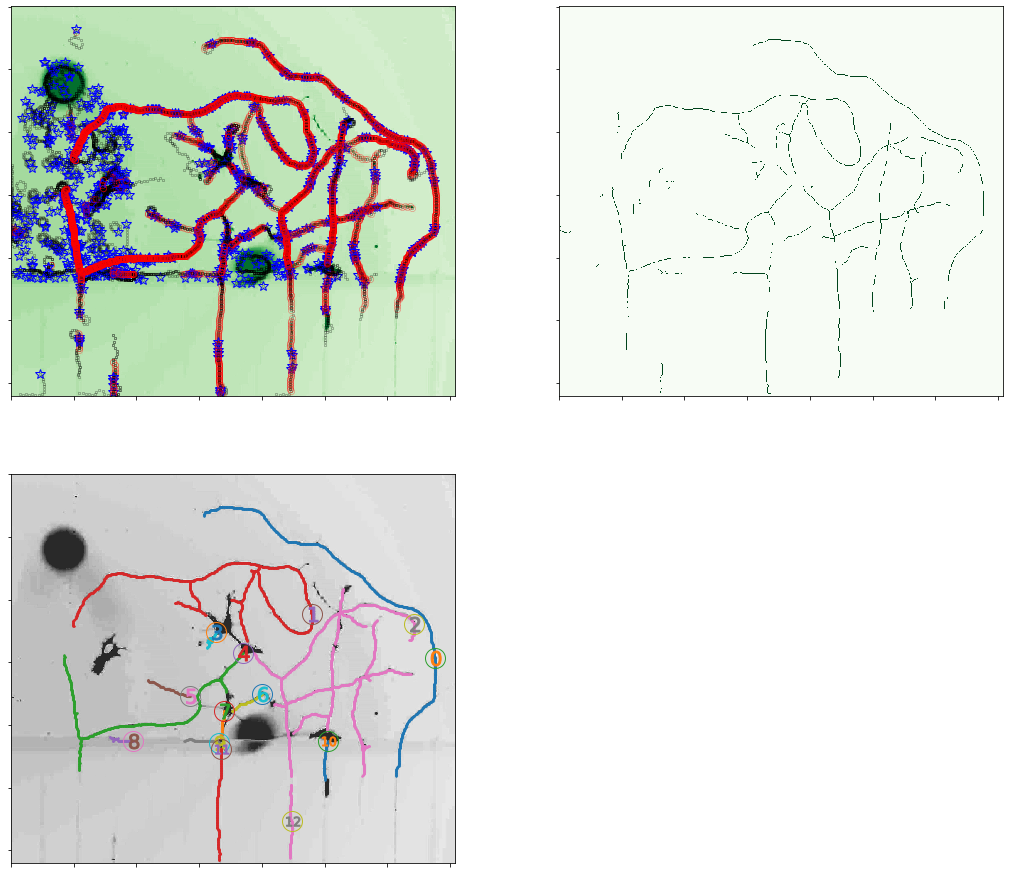

In [8]:
section_name = '_selected_seeding'
###
### reading mmm_array +++
image_name = '_raw'
channel_color = channel_color_order[1]
file_suffix = '.npy'
file_reading = os.path.join(sample_saving_path, file_name + image_name + channel_color + file_suffix)
mm = np.load(file_reading)
mmm = np.copy(mm)
total_pixel_y, total_pixel_x = mmm.shape
### reading mmm_array ---
###
### AlvaHmm +++
alva_HMM = alva_MCMC.AlvaHmm(mmm, 
                             total_node = 16,
                             total_path = None,
                             node_r = None,
                             node_angle_max = None,)
# seed_yy, seed_xx = alva_HMM.seeding_by_local_max(min_sigma = None,
#                              max_sigma = None,
#                              threshold = 0.02,)
### seeding +++
# seed_xx = np.copy(selected_seed_xx)
# seed_yy = np.copy(selected_seed_yy)
### seeding ---
chain_HMM_1st, pair_chain_HMM, pair_seed_xx, pair_seed_yy = alva_HMM.pair_HMM_chain(seed_xx = seed_xx,
                                                                                    seed_yy = seed_yy,
                                                                                    chain_level = 1.05,)
### AlvaHmm ---
###
###############
### plotting
figure_name = '{:}'.format(section_name)
file_suffix = '.png'
save_figure = os.path.join(sample_saving_path, file_name + figure_name + file_suffix)
AlvaFontSize = 21
wX = 2
wY = 2
wxx = 9 # window_width
figure = plt.figure(figsize = (wX*wxx, wY*wxx*(raw_pixel_y / raw_pixel_x)))
for wn in range(wX*wY):
    if (wn == 0):
        window = figure.add_subplot(wY, wX, wn + 1)
        ### chain_HMM +++
        for chain_i in [0, 1]:
            chain_HMM = [chain_HMM_1st, pair_chain_HMM][chain_i]
            ###
            real_chain_ii, real_chain_aa, real_chain_xx, real_chain_yy = chain_HMM[0:4]
            seed_node_xx, seed_node_yy = chain_HMM[4:6]
        ### chain_HMM ---
            ### all seeding_point and their tracking
            for i in range(seed_node_xx.shape[0]):
                window.plot(seed_node_xx[i], seed_node_yy[i],
                            '.', markersize = 5 / 1, 
                            markerfacecolor = 'none', markeredgecolor = 'black', markeredgewidth = 0.25)
                window.plot(seed_node_xx[i, 0], seed_node_yy[i, 0],
                            '*', markersize = 10, markerfacecolor = 'none', markeredgecolor = 'blue')
            ### real_chain
            for i in range(real_chain_ii.shape[0]):
                window.plot(real_chain_xx[i][real_chain_ii[i]], real_chain_yy[i][real_chain_ii[i]],
                            'o', markersize = 5 / 0.8, markerfacecolor = 'none',
                            markeredgecolor = 'red', markeredgewidth = 0.25)
            ###
        window.imshow(mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('total seeds = {:}'.format(len(seed_xx)), fontsize = AlvaFontSize)
        #window.grid(True)
        ### window_saving +++
        section_name_in = '_selected_seed'
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
    if (wn == 1):
        window = figure.add_subplot(wY, wX, wn + 1)
        ###
        chain_mmm_fine = alva_HMM.chain_image(chain_HMM_1st, pair_chain_HMM,)
        ###
        new_mmm = chain_mmm_fine
        ### saving_new_mmm +++
        file_suffix = '.png'
        saving_data_file = file_name + section_name
        mpl.image.imsave(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ###
        file_suffix = '.npy'
        np.save(os.path.join(sample_saving_path, saving_data_file + file_suffix), new_mmm)
        ### saving_new_mmm ---
        window.imshow(new_mmm, cmap = channel_color + 's', interpolation = 'nearest')
        #window.set_title('fine_way (selected seed)', fontsize = AlvaFontSize) 
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        #window.grid(True)
        ### window_saving +++
        section_name_in = '_fine_way'
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
    if (wn == 2):
        window = figure.add_subplot(wY, wX, wn + 1)
        ###
        root_tree_yy, root_tree_xx, root_tip_yy, root_tip_xx = alva_branch.connect_way(chain_mmm_fine,
                                                                                       line_length_min = 32,
                                                                                       free_zone_from_y0 = None,)
        ###
        number_marker = np.arange(len(root_tree_xx))
        for i in range(len(root_tree_xx)):
            ###
            connect_xx = root_tree_xx[i]
            connect_yy = root_tree_yy[i]
            ###
            window.plot(root_tree_xx[i], root_tree_yy[i], '.', markersize = 3)
            window.plot(root_tip_xx[i], root_tip_yy[i], marker = '${:}$'.format(number_marker[i]), markersize = 15)
            window.plot(root_tip_xx[i], root_tip_yy[i], marker = 'o', markersize = 20, markerfacecolor = 'None')
        ###
        ### frame_only +++
        window.imshow(mmm, cmap = 'Greys', interpolation = 'nearest')
        ### frame_only +++
        #window.set_title('connect_way (selected seed)', fontsize = AlvaFontSize) 
        window.set_xticklabels(np.int64(window.get_xticks()), fontsize = AlvaFontSize*0.8, rotation = 0) 
        window.set_yticklabels(np.int64(window.get_yticks()), fontsize = AlvaFontSize*0.8)
        #window.grid(True)
        ### window_saving +++
        section_name_in = '_connected_way'
        window.set_xticklabels([])
        window.set_yticklabels([])
        window_name = '{:}{:}_window{:}'.format(section_name, section_name_in, wn)
        file_suffix = '.png'
        save_window = os.path.join(sample_saving_path, file_name + window_name + file_suffix)
        extent = window.get_window_extent().transformed(figure.dpi_scale_trans.inverted())
        figure.savefig(save_window, dpi = 360, bbox_inches = extent)
        ### window_saving --- 
###
#figure.tight_layout()
plt.savefig(save_figure, dpi = 128)#, bbox_inches = 'tight')
plt.show()
##########

# Mapping the way